### Perceptron: Linear model results using company Grendene (GRND3)

**Perceptron:** The simplest and oldest model of Neuron, as we know it. Takes some inputs, sums them up, applies activation function and passes them to output layer. No magic here.

<img src="./img/perceptron.png" alt="Drawing" style="width: 200px;"/>

In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import RandomUniform as rnd_uni

x_csv_path = './data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = './data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

Using TensorFlow backend.


### 1) Linear Model without val split

  80% train / 20% test / 0% validation split
  
  kernel_initializer: random_uniform
  
  layers: input(X columns), output (1)
  
  optimizer: adam
  
  loss: MSE

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
<IPython.core.display.Image object>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 57        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

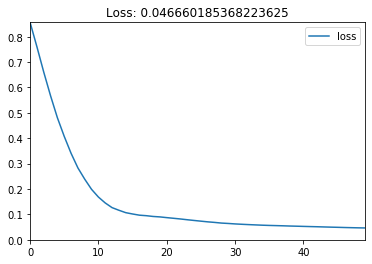

                          feature_weight
Não Consolidado                         
VPA Valor Patr por Acao$        0.082076
EBIT / Divida Bruta %           0.081750
Capital de Giro $               0.078492
Depreciacao e amortiz $         0.075534
Prazo Med Estoques(dias)        0.074368
Capex (inc inv)/Deprec %        0.071253
Vendas por Acao $               0.067111
Liquidez Corrente x             0.061463
Capital Employed $              0.058100
Liquidez Seca x                 0.056957
Ciclo Operacional (dias)        0.054109
EBITDA $                        0.051007
Fluxo de caixa livre $          0.047875
Prazo Med Recebim (dias)        0.047001
Divida CP / Divida Tt %         0.040584
Margem EBIT (Operac) %          0.039539
Divida Bruta / Ebitda x         0.029099
Divida Liq / Pat Liq %          0.028286
EBIT / Desp Fin Brut x          0.027421
Margem Liquida %                0.027172
Investimentos / Pat Lq %        0.027061
Margem Ebitda %                 0.023327
Invested Capital

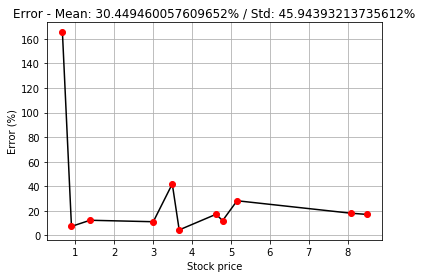

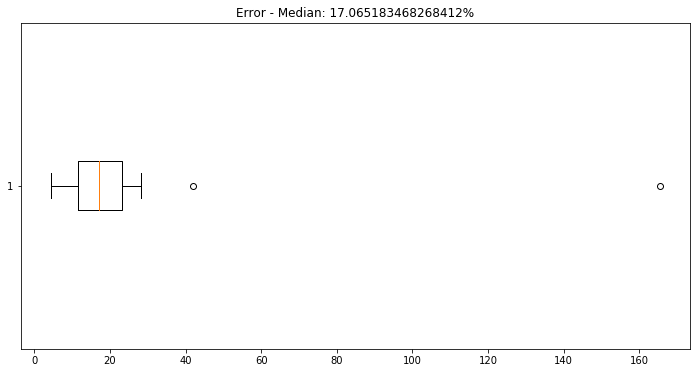

count     11.000000
mean      30.449460
std       45.943932
min        4.437018
25%       11.571620
50%       17.065183
75%       23.125714
max      165.388836
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.042025  8.491036  17.065183
0     6.616558  8.075241  18.063645
7     6.610632  5.156991  28.187783
9     4.209561  4.785659  12.037997
2     5.408326  4.616062  17.163198
1     3.832302  3.669486   4.437018
3     2.669904  3.003443  11.105243
10    1.547430  1.377930  12.301050
5     0.966355  0.900556   7.306411


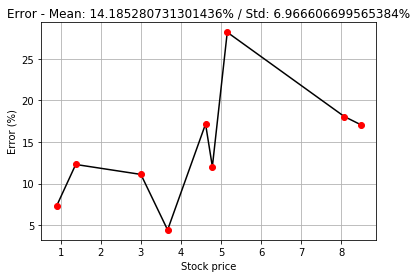

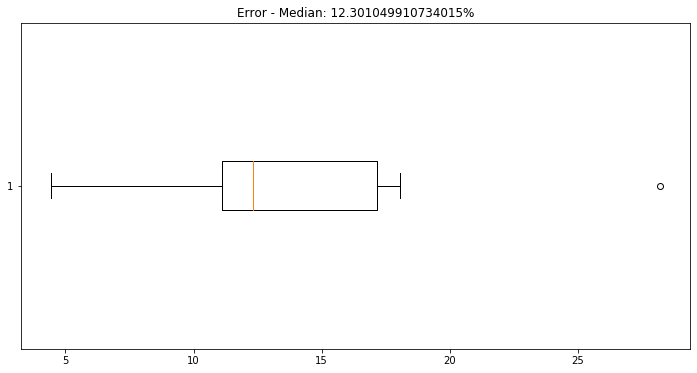

count     9.000000
mean     14.185281
std       6.966607
min       4.437018
25%      11.105243
50%      12.301050
75%      17.163198
max      28.187783
Name: % error, dtype: float64
MSE of training: 0.04603746872056614
MSE of testing: 0.15847615897655487
MSE of testing without first outliers: 0.1336093246936798


In [2]:
# Keras Initializer with seed
random_uniform = rnd_uni(minval=-0.05, maxval=0.05, seed=0)
# Create model
linear_model = tcc_utils.linear_model(x_train, random_uniform)
# Fit model
linear_history = linear_model.fit(x_train, y_train, epochs=50, verbose=0)
# Evaluate model
result_df = tcc_utils.evaluate_model(linear_model, linear_history, x_train,
                         y_train, x_test, y_test, X, y_scaler, linear=True,
                        model_name='Perceptron 1 | rnd | adam | relu')

### 2) Linear Model with val split

72% train / 20% test / <font color=red>8%</font> validation split
  
  kernel_initializer: random_uniform
  
  layers: input(X columns), output (1)
  
  optimizer: adam
  
  loss: MSE

<IPython.core.display.Image object>
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 57        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

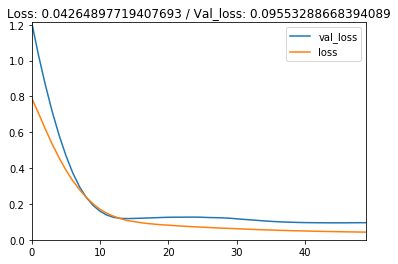

                          feature_weight
Não Consolidado                         
VPA Valor Patr por Acao$        0.083318
EBIT / Divida Bruta %           0.082875
Capital de Giro $               0.080250
Depreciacao e amortiz $         0.076149
Prazo Med Estoques(dias)        0.070745
Capex (inc inv)/Deprec %        0.068887
Vendas por Acao $               0.066640
Liquidez Corrente x             0.063594
Liquidez Seca x                 0.060120
Capital Employed $              0.059319
Ciclo Operacional (dias)        0.053164
Fluxo de caixa livre $          0.053011
EBITDA $                        0.051637
Prazo Med Recebim (dias)        0.050012
Margem EBIT (Operac) %          0.045565
Divida CP / Divida Tt %         0.030492
Divida Bruta / Ebitda x         0.029316
Margem Ebitda %                 0.028741
Investimentos / Pat Lq %        0.027461
Margem Liquida %                0.027173
Divida Liq / Pat Liq %          0.025854
EBIT / Desp Fin Brut x          0.025782
Exigivel Tt / Re

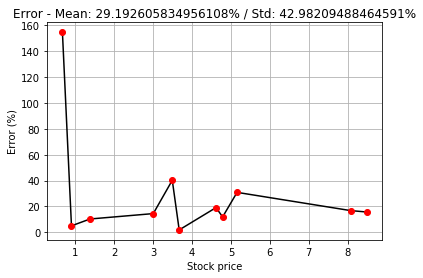

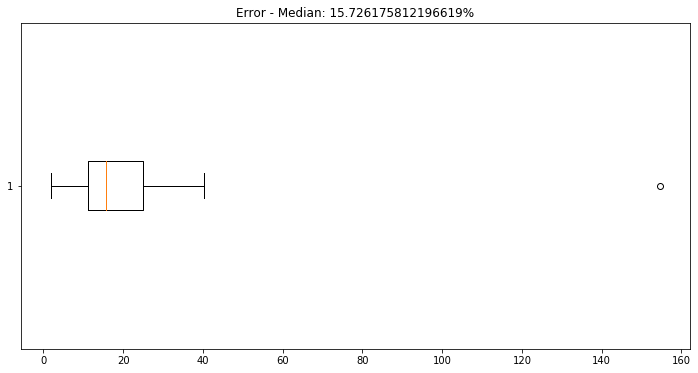

count     11.000000
mean      29.192606
std       42.982095
min        1.898491
25%       11.137327
50%       15.726176
75%       25.012428
max      154.559757
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
    Prediction      Real    % error
8     7.155721  8.491036  15.726176
0     6.716473  8.075241  16.826350
7     6.750373  5.156991  30.897521
9     4.214268  4.785659  11.939654
2     5.498992  4.616062  19.127335
1     3.739151  3.669486   1.898491
6     4.897185  3.491649  40.254217
3     2.567851  3.003443  14.503083
10    1.520340  1.377930  10.335001
5     0.855069  0.900556   5.051080


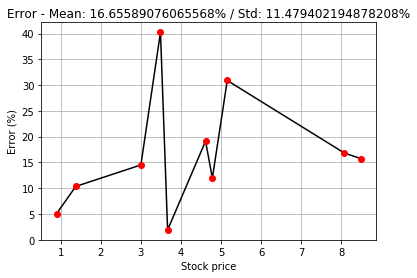

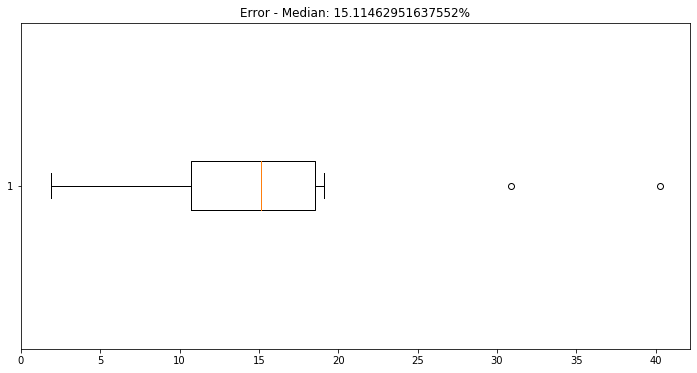

count    10.000000
mean     16.655891
std      11.479402
min       1.898491
25%      10.736164
50%      15.114630
75%      18.552089
max      40.254217
Name: % error, dtype: float64
MSE of training: 0.04819965430281379
MSE of testing: 0.1541179120540619
MSE of testing without first outliers: 0.15237312018871307


In [3]:
# Keras Initializer with seed
random_uniform = rnd_uni(minval=-0.05, maxval=0.05, seed=0)
# Create model
linear_model_with_val = tcc_utils.linear_model(x_train, random_uniform)
# Fit model
linear_history_with_val = linear_model_with_val.fit(x_train, y_train, epochs=50,
                                                    validation_split=0.1, verbose=0)
# Evaluate model
result_df = tcc_utils.evaluate_model(linear_model_with_val, linear_history_with_val, x_train,
                         y_train, x_test, y_test, X, y_scaler, linear=True,
                        model_name='Perceptron 2 | rnd | adam | relu | cv', val=True, existing_df=result_df)

In [4]:
result_df.to_csv(r'./results/results.csv')
result_df.sort_values(by='Testing MSE after removing outlier')

,Model Name,Testing MSE,Testing MSE after removing outlier,Training MSE
0,Perceptron 1 | rnd | adam | relu,0.158476,0.133609,0.046037
1,Perceptron 2 | rnd | adam | relu | cv,0.154118,0.152373,0.048200
